In [ ]:
var = 200

In [ ]:
print(var)

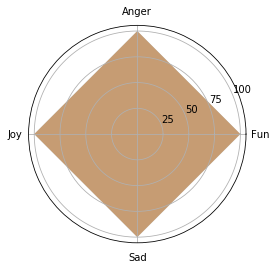

In [9]:
#!/usr/bin/env python
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from pylab import *

class RadarAxes(PolarAxes):
    """Class for creating a radar chart (a.k.a. a spider or star chart)        
    http://en.wikipedia.org/wiki/Radar_chart
    """
    name = 'radar'
    # use 1 line segment to connect specified points
    RESOLUTION = 1

    def draw_frame(self, x0, y0, r):
        verts = [(r*cos(t) + x0, r*sin(t) + y0) for t in theta]
        return Polygon(verts, closed=True)

    def set_varlabels(self, labels):
        self.set_thetagrids(theta * 180/pi, labels)

    def get_axes_patch(self):
        x0, y0 = (0.5, 0.5)
        r = 0.5
        return self.draw_frame(x0, y0, r)

if __name__ == '__main__':

    register_projection(RadarAxes)
    N = 4

    theta = 2*pi * linspace(0, 1, N+1)[:-1]
    theta += pi/2
    labels = ['Anger', 'Joy', 'Sad', 'Fun']
    rule_of_four = [1, 1, 1, 1]
    desc = [1, 1, 1, 1]
    desc = [1, 1, 1, 1]
    desc_rate = [100*desc[i]/float(v) for (i,v) in enumerate(rule_of_four)]

    ax = subplot(111, projection='radar')

    ax.fill(theta, [100]*N)
    ax.fill(theta, desc_rate)

    for patch in ax.patches:
        patch.set_alpha(0.5)

    ax.set_varlabels(labels)
    rgrids((25, 50, 75, 100))

    grid(True)
    show()
